<a href="https://colab.research.google.com/github/jadiribnahasan/Random/blob/master/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [163]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Artificial Intelligence/Data Sets/example_dataset.csv",sep="\t",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.780,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.120,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [164]:
print(df.shape)

(201, 12)


In [165]:
for i in range(12):
  for j in range(201):
    if df[i][j] == '?' or df[i][j] == '*' or df[i][j] == '.':
      if i == 11:
        df.drop(index=j, inplace=True)
      else:
        df[i][j] = np.nan
        
X = df.iloc[ : , :11].astype(float)
y = df.iloc[ : , 11]
print(X.shape, y.shape)

(198, 11) (198,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [166]:
X.fillna(X.mean(), inplace=True)

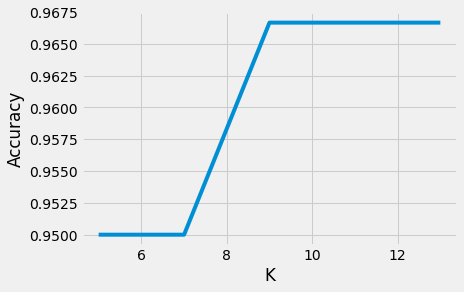

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, train_size=0.7, random_state=4)
ks = [5, 7, 9, 13]
knn_scores = []

for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  y_pred = knn.predict(xvalid)
  knn_scores.append(metrics.accuracy_score(yvalid,y_pred))

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(ks, knn_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


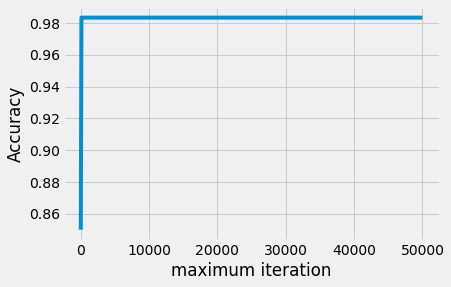

In [168]:
from sklearn.linear_model import LogisticRegression

mis = [5, 100, 500, 2000, 50000]
lg_scores = []

for mi in mis:
  lg = LogisticRegression(max_iter=mi)
  lg.fit(xtrain,ytrain)
  y_pred = lg.predict(xvalid)
  lg_scores.append(metrics.accuracy_score(yvalid,y_pred))

plt.xlabel('maximum iteration')
plt.ylabel('Accuracy')
plt.plot(mis, lg_scores)